In [1]:
# Description  : model uses a artificial recurrent neural network (RNN) called Long Short Term Memory (LSTM) to pridict stock prices 

[LSTM MODEL ARCHITECTURE-- A MUST READ ARTICLE 1](https://towardsdatascience.com/understanding-lstm-and-its-quick-implementation-in-keras-for-sentiment-analysis-af410fd85b47)

[LSTM MODEL ARCHITECTURE-- A MUST READ ARTICLE 2](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbGhBaFpGOF9oQXpnRHVPVHhxTlVDVVp6RVlnd3xBQ3Jtc0ttRlRJWDRJRFlGdGVXeWJSdkVGakxOc1hvZ1NyMXMxUFoyMlljcWdrdjBoUURtbmpJTU1iaC1qaVpfVW03LVp1SlRxWENPdE5KdG1jYWU0ZUJ1cm5uR29uS0xOVHd5VGc2UkpGaTVGdjdVOXBmbnhaVQ&q=http%3A%2F%2Fcolah.github.io%2Fposts%2F2015-08-Understanding-LSTMs%2F)

[VISUAL UNDERSTANDING OF ARCHITECTURE OF LSTM](https://www.youtube.com/watch?v=LfnrRPFhkuY)

pip install pandas-datareader

In [16]:
import numpy as np 
import math
import pandas as pd 
import pandas_datareader as pdr 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import sequential
from keras.layers import Dense , LSTM
from keras.models import Sequential
plt.style.use("fivethirtyeight")
import datetime
from datetime import  timedelta
from keras.models import load_model             # not going to run epoches everytime thus to run models


import streamlit as st




In [17]:
# Get the stock quote
# name should be exact from yahoo finance site
stock_name = "TECHM.NS"
df = pdr.DataReader(stock_name , data_source='yahoo',start='2000-01-01',end=datetime.datetime.now())

# show the data 
df


#df.to_csv('price.csv') to save data as csv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-08-28,142.250000,125.500000,130.250000,138.562500,60664652.0,111.446526
2006-08-29,140.975006,133.887497,138.750000,134.824997,15716452.0,108.440422
2006-08-30,135.725006,130.375000,134.250000,132.024994,8139932.0,106.188362
2006-08-31,136.000000,128.750000,131.250000,134.612503,6683960.0,108.269524
2006-09-01,137.250000,133.774994,134.750000,135.462494,4704780.0,108.953140
...,...,...,...,...,...,...
2022-04-13,1428.699951,1403.400024,1418.099976,1410.449951,1430399.0,1410.449951
2022-04-18,1390.000000,1330.199951,1390.000000,1344.550049,3968044.0,1344.550049
2022-04-19,1361.849976,1285.650024,1361.849976,1301.199951,2677360.0,1301.199951


In [18]:
df.shape

(3858, 6)

NameError: name 'Date' is not defined

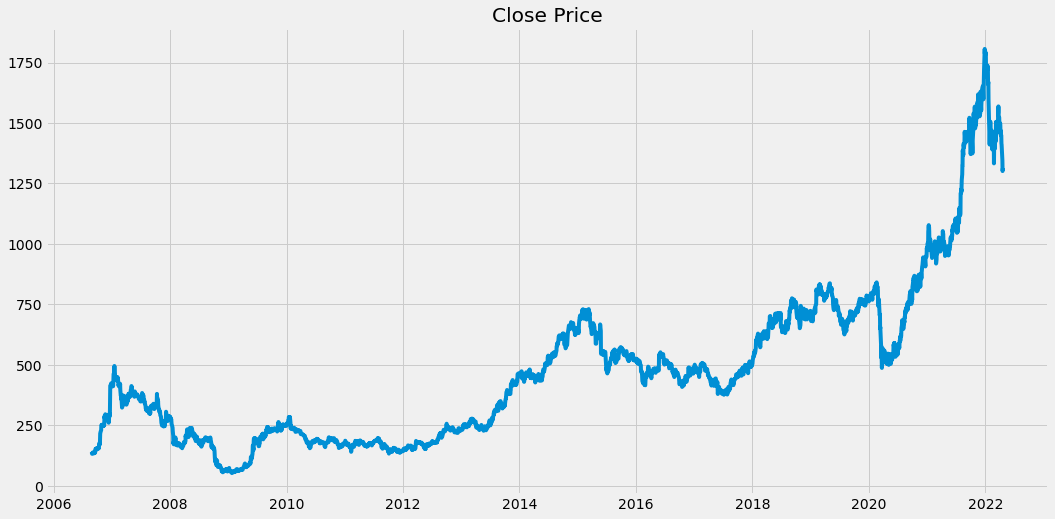

In [19]:
# visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel(xlabel = [Date], fontdict=8)
plt.xlabel(ylabel = 'Price (INR)', fontdict=8)
plt.show()

In [20]:
# defining 100day moving average
# thus it shows values from 101th index 
ma100 = df.Close.rolling(100).mean()
ma100

Date
2006-08-28            NaN
2006-08-29            NaN
2006-08-30            NaN
2006-08-31            NaN
2006-09-01            NaN
                 ...     
2022-04-13    1551.225004
2022-04-18    1549.257504
2022-04-19    1546.664003
2022-04-20    1544.375002
2022-04-21    1541.908502
Name: Close, Length: 3858, dtype: float64

In [21]:
ma200 = df.Close.rolling(200).mean()
#ma200

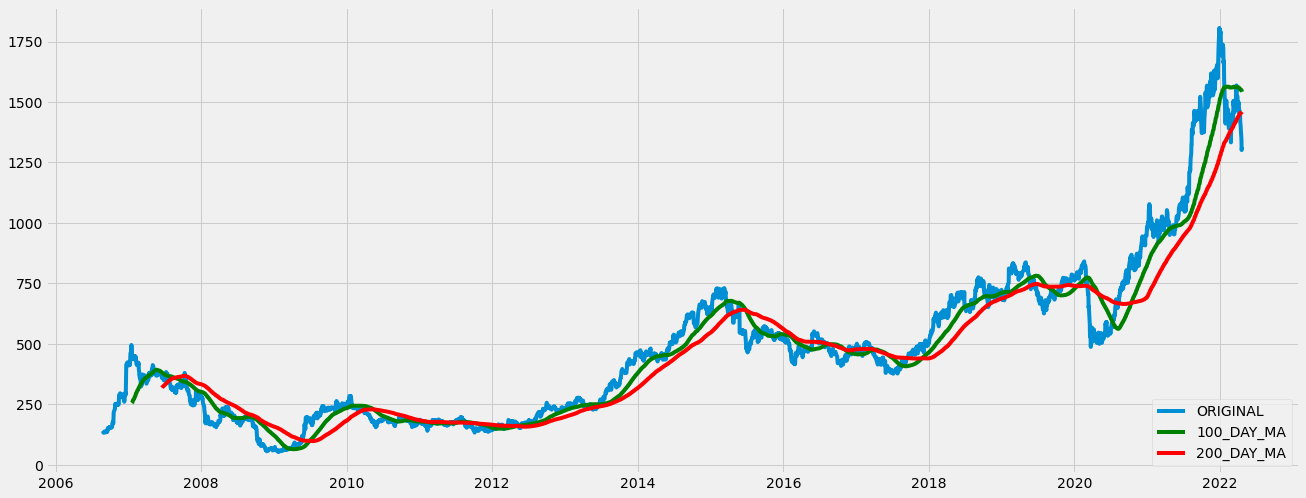

In [22]:
plt.figure(figsize=(20,8))
plt.plot(df.Close)
plt.plot(ma100,'g')
plt.plot(ma200,'r')
plt.legend(['ORIGINAL' , '100_DAY_MA' , '200_DAY_MA'] , loc= 'lower right')
plt.show()

In [23]:
# Creating a new df for only close price 
#data = df.filter(['Close','High'])           # gives 2 column 
data = df.filter(['Close'])                   # gives 1 column
data



,Close
Date,
2006-08-28,138.562500
2006-08-29,134.824997
2006-08-30,132.024994
2006-08-31,134.612503
2006-09-01,135.462494
...,...
2022-04-13,1410.449951
2022-04-18,1344.550049
2022-04-19,1301.199951


In [24]:
# create df to a  num py array         df.values : Only the values in the DataFrame will be returned, the axes labels will be removed.

dataset = data.values
dataset


array([[ 138.5625    ],
       [ 134.82499695],
       [ 132.0249939 ],
       ...,
       [1301.19995117],
       [1309.19995117],
       [1312.69995117]])

In [25]:

# Get the no of adta to train the model on say 65%
training_data_len = math.ceil(len(dataset)*0.65)                    #Return the ceiling of x as an Integral.
training_data_len

2508

In [26]:
# scale the data 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)                        # range [0-1] on numpy array of dataset
scaled_data

array([[0.0491725 ],
       [0.04704138],
       [0.04544482],
       ...,
       [0.71210672],
       [0.71666831],
       [0.71866401]])

In [27]:
# create a scaled training data set 
train_data = scaled_data[0:training_data_len , : ]                # till row = training data len all column points

# split the data into x_train  , and y_train data sets
x_train = []                                                      # features = independent variables 
y_train = []                                                      # lables = output = dependent variables 

for i in range(60 , len(train_data)): 
    x_train.append(train_data[i-60:i , 0])                        # we are going to append 0 to 89th  values of train_data in 0th column
    y_train.append(train_data[i , 0])                             # lable/ prediction is 90th data point of 0th column from train_data to y_train
    
    if i <= 62:
        print(x_train)
        print()
        print(y_train)
       

[array([0.0491725 , 0.04704138, 0.04544482, 0.04692022, 0.04740488,
       0.04770424, 0.04895155, 0.04731935, 0.04675628, 0.04639991,
       0.04656384, 0.04683468, 0.04781115, 0.04854528, 0.04716968,
       0.04806774, 0.05344899, 0.05641402, 0.05696997, 0.05585808,
       0.0547747 , 0.05820302, 0.05846674, 0.05754729, 0.05831706,
       0.05845961, 0.05764708, 0.05913672, 0.05873045, 0.05769697,
       0.05795355, 0.05996351, 0.05992787, 0.06737609, 0.07143876,
       0.07059058, 0.06767544, 0.08031247, 0.09323459, 0.09819533,
       0.10111759, 0.11284943, 0.1136477 , 0.11124574, 0.11403259,
       0.11307038, 0.11157361, 0.11247167, 0.11142393, 0.11138829,
       0.11094638, 0.11262134, 0.11353366, 0.11216519, 0.12320565,
       0.13451697, 0.12912146, 0.13254266, 0.13870793, 0.13758892])]

[0.13405367872452223]
[array([0.0491725 , 0.04704138, 0.04544482, 0.04692022, 0.04740488,
       0.04770424, 0.04895155, 0.04731935, 0.04675628, 0.04639991,
       0.04656384, 0.04683468, 0.04

In [28]:
# convert x_train and y_train to numpy arrays so that array data can be provided to LSTM model
x_train , y_train = np.array(x_train) , np.array(y_train)

# x_train.shape               (2363, 30)   # after appending in every row tere are 30 columns of data 

# x_train                                  # is 2d type row  and column data

# reshaping the x_train data set as a LSTM model expects the input to be a three dimentionals array 
x_train = np.reshape(x_train ,newshape= (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape



(2448, 60, 1)

In [12]:
# Build the LSTM model 
model = Sequential()

# add a layer of 50 neuron , there output to be used in next layer thus return seq = true , since first layer thus shape of input neuron   , 
# input shape = (time step , features ) = (90 days , 1 ) = (90 , close price)
model.add(LSTM(50, activation ='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
 
# add 1 last lstm layer but no lstm further thus return_sequence = False
model.add(LSTM(50, return_sequences=False))

# adding last dense layer          
model.add(Dense(25))  

# adding last dense layer          
model.add(Dense(1)) 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
# compile the model 
# optimizer is used to minimise the loss fx 
# loss fx is used to calculate what was the loss to see how well the model did on traiing 

model.compile(optimizer='adam' , loss="mean_squared_error")

In [15]:
# train the model
model.fit(x=x_train,y=y_train,batch_size=1,epochs=1)

1488/2448 [=================>............] - ETA: 17s - loss: 3.6518e-04

KeyboardInterrupt: 

In [ ]:
model.save('{}_keras_model.h5'.format(stock_name))

In [29]:
# creating the testing data set
# create a new array containing scaled values from index  end of len(train_data) till end of the total data

test_data = scaled_data[training_data_len-60 : , : ]         # all data from 60th to end of data with all column

# creating a dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len : , : ]                          # actual prediction values
                                                                    # dataset values are original closing prce and not scaled

for i in range(60 , len(test_data)):
    x_test.append(test_data[i-60 : i, 0 ])
    
type(x_test)  

list

In [30]:
len(y_test)

1350

In [31]:
# create the data to a numpy array as model need 3d array
x_test = np.array(x_test)
print(type(x_test))

# reshape the data for the model      (newshape =no of rows = x_test.shape[0], timesteps = 60 days = x_test.shape[1] , and 1 )
x_test = np.reshape(x_test , newshape= (x_test.shape[0] , x_test.shape[1] , 1 ))
x_test

<class 'numpy.ndarray'>


array([[[0.25523515],
        [0.25244116],
        [0.25734487],
        ...,
        [0.21737395],
        [0.2152357 ],
        [0.21420935]],

       [[0.25244116],
        [0.25734487],
        [0.25668915],
        ...,
        [0.2152357 ],
        [0.21420935],
        [0.21537825]],

       [[0.25734487],
        [0.25668915],
        [0.2536671 ],
        ...,
        [0.21420935],
        [0.21537825],
        [0.2238172 ]],

       ...,

       [[0.91712165],
        [0.92245299],
        [0.92062839],
        ...,
        [0.77699535],
        [0.77440092],
        [0.73682489]],

       [[0.92245299],
        [0.92062839],
        [0.87880433],
        ...,
        [0.77440092],
        [0.73682489],
        [0.71210672]],

       [[0.92062839],
        [0.87880433],
        [0.83296035],
        ...,
        [0.73682489],
        [0.71210672],
        [0.71666831]]])

In [32]:
# # no need to train model now just load it
model = load_model('{}_keras_model.h5'.format(stock_name)) 

                                                            # Get the models predicted values
y_predictions = model.predict(x_test)                    # scaled value

y_predictions.shape


(1350, 1)

In [33]:
#predict_x=model.predict(token_list)
#classes_x=np.argmax(predict_x,axis=1)

#y_predictions=model.predict(x_test)
#y_predictions=np.argmax(y_predictions,axis=1)



In [34]:
# undo scaling
                                                           # we want the predictions to be exact same as real lables 
y_predictions = scaler.inverse_transform(y_predictions)        # Undo the scaling of X according to feature_range(0-1)
                                                           # gaining back the real value

In [35]:
y_predictions

array([[ 444.65637],
       [ 446.84952],
       [ 462.6524 ],
       ...,
       [1363.1168 ],
       [1326.5822 ],
       [1340.2725 ]], dtype=float32)

In [36]:
# EVALUATE THE MODEL root mean square error (RMSE)
# its a measure of how good the model predicts the response 
# can be compared by std deviation less
# lower value of rmse is better : try diff range of dataset 

rmse = np.sqrt(np.mean(y_predictions - y_test)**2)
rmse


23.701033257378473

C:\Users\Admin\AppData\Local\Temp/ipykernel_7872/2145182999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = y_predictions                       # valid(prediction) = y_prediction


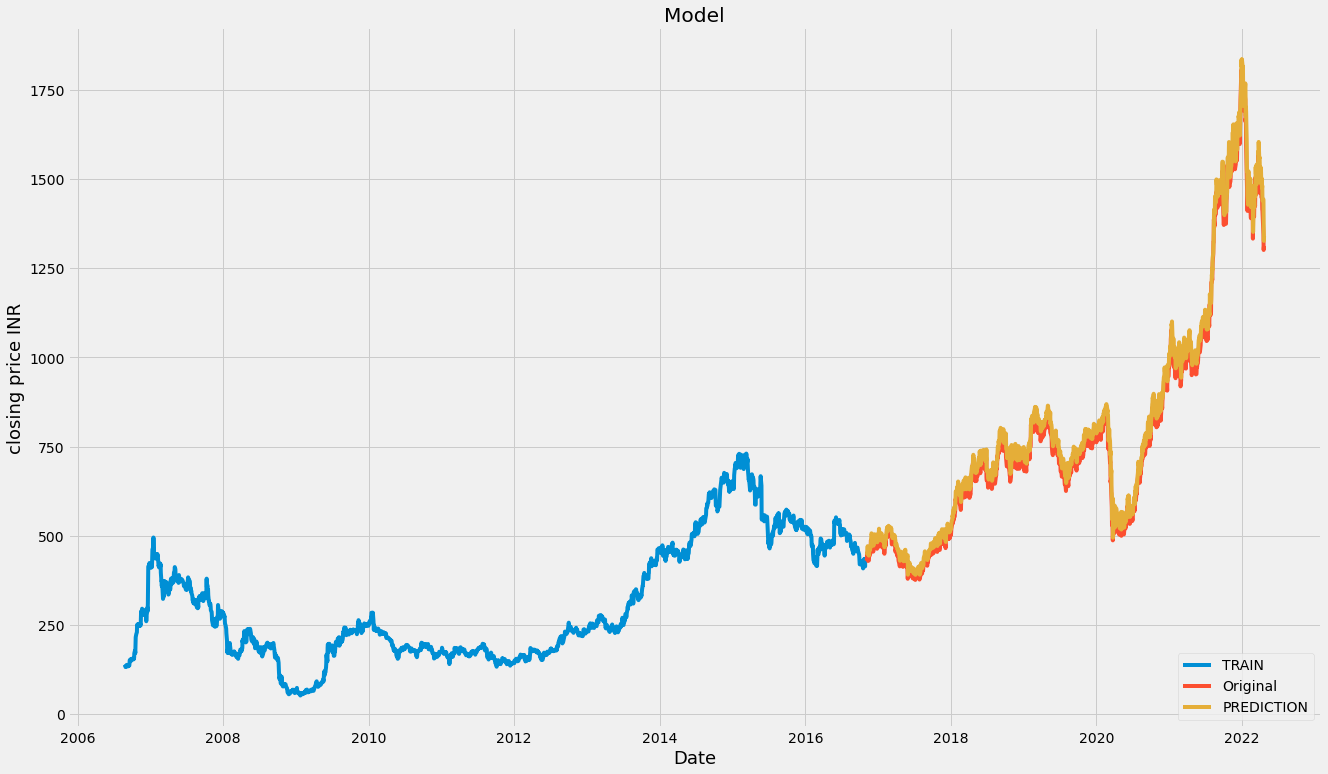

In [37]:
# plot the data
train = data[ : training_data_len]                              # train = x_train
valid = data[training_data_len : ]                              # valid = y_test                
valid['predictions'] = y_predictions                       # valid(prediction) = y_prediction

# visualise the model 
plt.figure(figsize=(20,12))
plt.title('Model')
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('closing price INR' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['TRAIN' , 'Original' , 'PREDICTION'] , loc= 'lower right')

plt.show()


In [39]:
# show the valid and predicted price
valid

,Close,predictions
Date,,
2016-11-04,430.049988,444.656372
2016-11-07,444.850006,446.849518
2016-11-08,454.149994,462.652405
2016-11-09,434.500000,470.939270
2016-11-10,442.250000,449.370850
...,...,...
2022-04-13,1410.449951,1439.828613
2022-04-18,1344.550049,1442.815918
2022-04-19,1301.199951,1363.116821


In [40]:
valid.tail(30)

,Close,predictions
Date,,
2022-03-08,1461.949951,1451.845093
2022-03-09,1504.750000,1501.228638
2022-03-10,1485.349976,1533.712158
2022-03-11,1486.800049,1514.735474
2022-03-14,1503.000000,1524.588501
2022-03-15,1458.599976,1540.807983
2022-03-16,1489.900024,1486.219971
2022-03-17,1493.500000,1532.761963
2022-03-21,1479.800049,1524.556763


# future prediction

In [41]:
# Get the quotes
stock_quote = pdr.DataReader( stock_name ,data_source='yahoo',start='2000-01-01',end=(datetime.datetime.now() + timedelta(days=1)))
# create a new dataframe 
new_df = stock_quote.filter(['Close'])
# Get the last 60days closing price value and convert the data form tp numpy array
last_90days = new_df[-60 :].values
# Scale the data as per previous tramsformation made
last_90days_scaled = scaler.transform(last_90days)     # here not using fit.transform because we want to transform by using same last value ranges thus not creating new one
# create an empty list 
X_TEST = []
# Append last 90 days 
X_TEST.append(last_90days_scaled)
# convert the X_TEST  to a numpy array
X_TEST = np.array(X_TEST)
# Reshape the data for LSTM model 
X_TEST = np.reshape(X_TEST , newshape= (X_TEST.shape[0] ,X_TEST.shape[1] , 1 ))   # last is 1 because 1 feature of close price is required
# loading the model
model = load_model('{}_keras_model.h5'.format(stock_name)) 
# Get the predicted scaled price 
pred_price = model.predict(X_TEST)
# Undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
pred_price


array([[1339.106]], dtype=float32)

In [42]:
# check one day prediction
# actual price
start_date = (datetime.datetime.now()  + timedelta(days=-1))

end_date = (datetime.datetime.now())
stock_actual = pdr.DataReader( stock_name ,data_source='yahoo',start= start_date,end=end_date)
stock_actual['Close']

Date
2022-04-20    1309.199951
2022-04-21    1312.699951
Name: Close, dtype: float64

In [43]:
#print((datetime.datetime.now() + timedelta(days=1)))

<class 'numpy.ndarray'>


C:\Users\Admin\AppData\Local\Temp/ipykernel_7872/1639519454.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = y_predictions                       # valid(prediction) = y_prediction


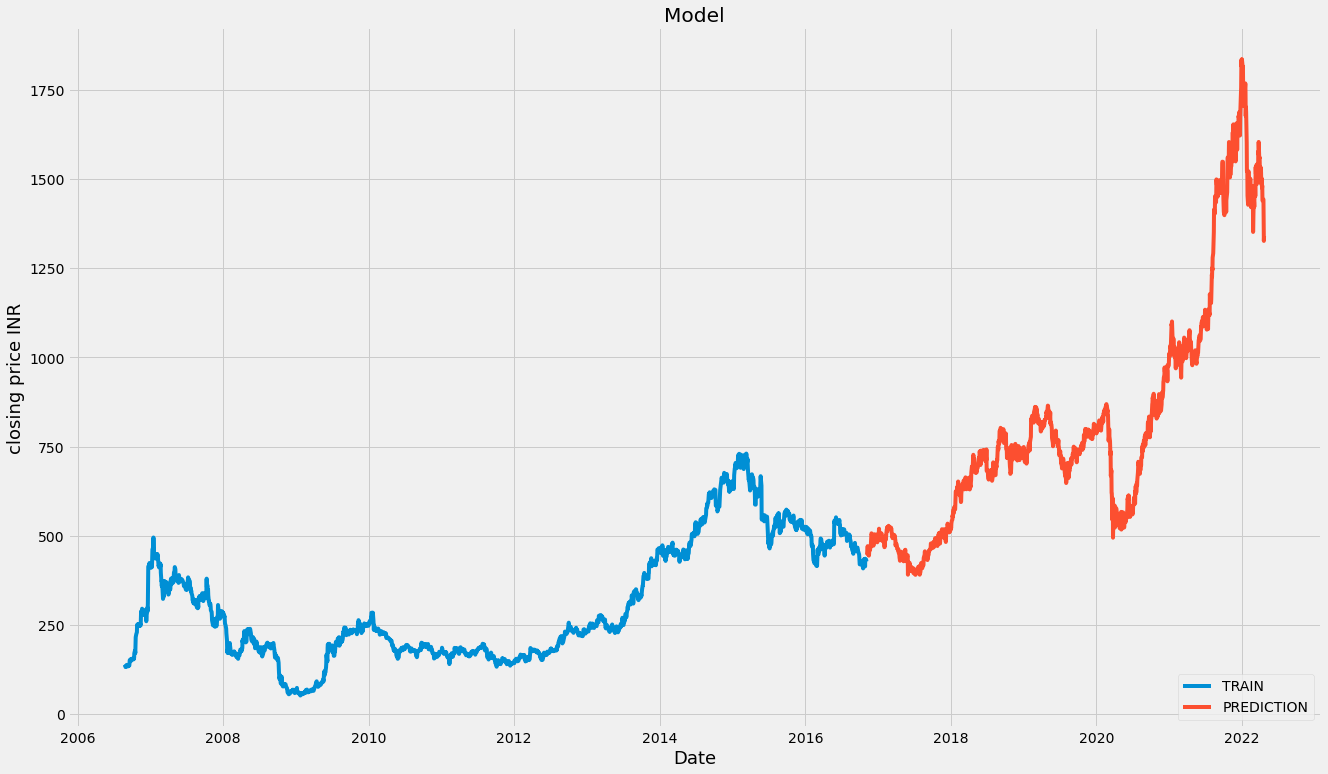

In [44]:
# prediction for next 30 days 

# creating the testing data set
# create a new array containing scaled values from index  end of len(train_data) till end of the total data

test_data = scaled_data[training_data_len-60 : , : ]         # all data from 60th to end of data with all column

# creating a dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len : , : ]                          # actual prediction values
                                                                    # dataset values are original closing prce and not scaled

for i in range(60 , len(test_data)):
    x_test.append(test_data[i-60 : i, 0 ])
    

    # create the data to a numpy array as model need 3d array
x_test = np.array(x_test)
print(type(x_test))

# reshape the data for the model      (newshape =no of rows = x_test.shape[0], timesteps = 60 days = x_test.shape[1] , and 1 )
x_test = np.reshape(x_test , newshape= (x_test.shape[0] , x_test.shape[1] , 1 ))
x_test

                                                            # Get the models predicted values
y_predictions = model.predict(x_test)                    # scaled value

# undo scaling
                                                           # we want the predictions to be exact same as real lables 
y_predictions = scaler.inverse_transform(y_predictions)        # Undo the scaling of X according to feature_range(0-1)
                                                           # gaining back the real value
    
# plot the data
train = data[ : training_data_len]                              # train = x_train
                            # valid = y_test                
valid['predictions'] = y_predictions                       # valid(prediction) = y_prediction

# visualise the model 
plt.figure(figsize=(20,12))
plt.title('Model')
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('closing price INR' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid['predictions'])
plt.legend(['TRAIN' , 'PREDICTION'] , loc= 'lower right')
plt.show()
    
    

In [45]:

model = load_model('{}_keras_model.h5'.format(stock_name))
# Get the quotes
stock_quote = pdr.DataReader( stock_name ,data_source='yahoo',start='2000-01-01',end=datetime.datetime.now())
# create a new dataframe 
new_df = stock_quote.filter(['Close'])
# Get the last 60days closing price value and convert the data form tp numpy array
last_90days = new_df[-60 :].values
# Scale the data as per previous tramsformation made
last_90days_scaled = scaler.transform(last_90days)     # here not using fit.transform because we want to transform by using same last value ranges thus not creating new one
# create an empty list 
X_TEST = []
# Append last 90 days 
X_TEST.append(last_90days_scaled)
#print(X_TEST)
# convert the X_TEST  to a numpy array
X_TEST = np.array(X_TEST)
# Reshape the data for LSTM model 
X_TEST = np.reshape(X_TEST , newshape= (X_TEST.shape[0] ,X_TEST.shape[1] , 1 ))   # last is 1 because 1 feature of close price is required
#print(X_TEST.shape)
# loading the model
pred_price = model.predict(X_TEST)

(pred_price)

array([[0.73372066]], dtype=float32)

In [46]:
unscaled_pred_price = []
for i in range(0,60):
    
    
    pred_price = model.predict(X_TEST)
    unscaled_pred_price.append(scaler.inverse_transform((pred_price)))
    # Get the predicted scaled price 
    
   
    
    #last_90days_scaled.append(X_TEST[1][60+i+1][1]) = pred_price[i]
    last_90days_scaled = np.append(last_90days_scaled , float(pred_price) )
    last_90days_scaled = last_90days_scaled[-60 :]
    X_TEST = []
    X_TEST.append(last_90days_scaled)
    X_TEST = np.array(X_TEST)
    X_TEST = np.reshape(X_TEST , newshape= (X_TEST.shape[0] ,X_TEST.shape[1] , 1 ))   # last is 1 because 1 feature of close price is required
    
    
unscaled_pred_price

[array([[1339.106]], dtype=float32),
 array([[1368.8021]], dtype=float32),
 array([[1392.3246]], dtype=float32),
 array([[1413.328]], dtype=float32),
 array([[1435.493]], dtype=float32),
 array([[1459.7283]], dtype=float32),
 array([[1485.9877]], dtype=float32),
 array([[1513.9982]], dtype=float32),
 array([[1543.4766]], dtype=float32),
 array([[1574.2323]], dtype=float32),
 array([[1606.3892]], dtype=float32),
 array([[1639.9215]], dtype=float32),
 array([[1674.7338]], dtype=float32),
 array([[1710.7911]], dtype=float32),
 array([[1747.9874]], dtype=float32),
 array([[1785.7562]], dtype=float32),
 array([[1823.989]], dtype=float32),
 array([[1861.7698]], dtype=float32),
 array([[1898.2429]], dtype=float32),
 array([[1932.9062]], dtype=float32),
 array([[1965.2423]], dtype=float32),
 array([[1994.738]], dtype=float32),
 array([[2021.1365]], dtype=float32),
 array([[2044.0591]], dtype=float32),
 array([[2063.2258]], dtype=float32),
 array([[2077.9363]], dtype=float32),
 array([[2087.186

In [285]:
x = [list(i) for i in unscaled_pred_price]
x

[[array([3963.0784], dtype=float32)],
 [array([3967.5347], dtype=float32)],
 [array([3987.0762], dtype=float32)],
 [array([4016.049], dtype=float32)],
 [array([4050.7993], dtype=float32)],
 [array([4088.927], dtype=float32)],
 [array([4128.9316], dtype=float32)],
 [array([4169.9155], dtype=float32)],
 [array([4211.3706], dtype=float32)],
 [array([4253.0166], dtype=float32)],
 [array([4294.72], dtype=float32)],
 [array([4336.4165], dtype=float32)],
 [array([4378.0825], dtype=float32)],
 [array([4419.7114], dtype=float32)],
 [array([4461.303], dtype=float32)],
 [array([4502.859], dtype=float32)],
 [array([4544.3745], dtype=float32)],
 [array([4585.8486], dtype=float32)],
 [array([4627.2734], dtype=float32)],
 [array([4668.641], dtype=float32)],
 [array([4709.942], dtype=float32)],
 [array([4751.1636], dtype=float32)],
 [array([4792.2964], dtype=float32)],
 [array([4833.328], dtype=float32)],
 [array([4874.2437], dtype=float32)],
 [array([4915.032], dtype=float32)],
 [array([4955.681], dt

C:\Users\Admin\AppData\Local\Temp/ipykernel_12892/2705301016.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = x[:]


ValueError: setting an array element with a sequence.

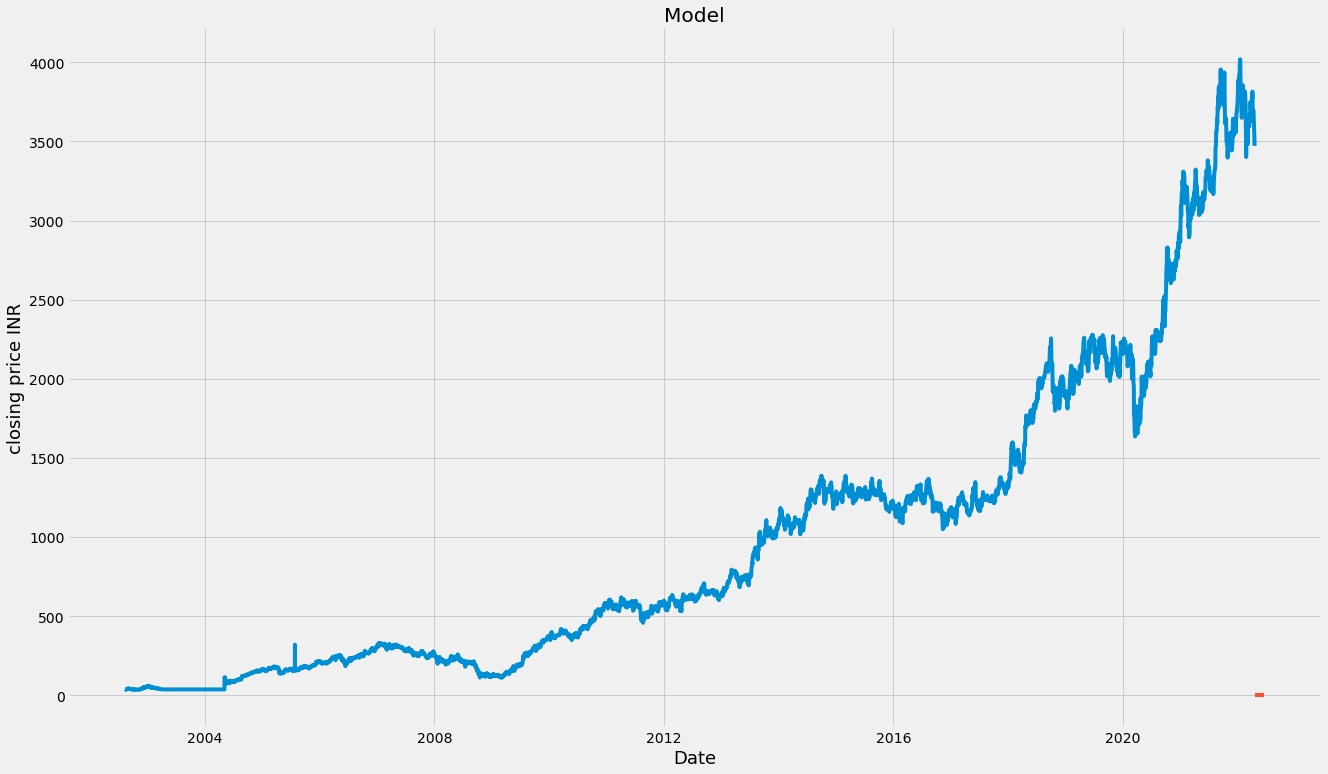

In [287]:
                              # train = x_train
                   
import datetime
import pandas as pd
 
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date, periods=60, freq='D')
 
columns = ['A']
 
empty_df = pd.DataFrame(index=index, columns=columns)
empty_df = empty_df.fillna(0)
 
#print(empty_df)


# plot the data
train = data[ : ]
valid = empty_df[ : ]                                      
valid['predictions'] = x[:]  




# visualise the model 
fig = plt.figure(figsize=(20,12))
plt.title('Model')
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('closing price INR' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['A', 'predictions']])
plt.legend(['TRAIN' , 'Original' , 'PREDICTION'] , loc= 'lower right')
plt.show()
    